## Modelos lineales de regresión
\begin{align*}
\end{align*}

>> Se utiliza en análisis de datos numéricos

A continuación, se muestra el gráfico del ajuste por regresión lineal de los datos del dataset *Wave*.  Lo mostramos para adelantar la discusión teórica sobre el modelo, más abajo aprenderemos cómo entrenar modelos lineales.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import scipy as sp


w[0]: 0.393906  b: -0.031804


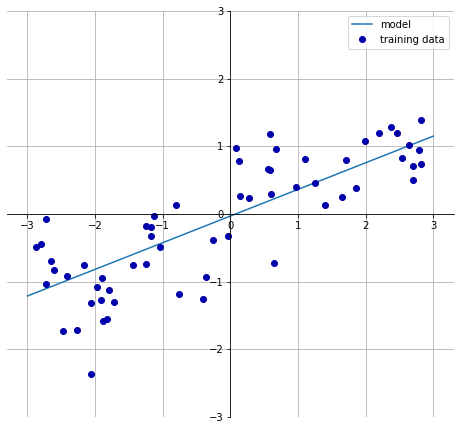

In [5]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

Se puede ver que el corte de la línea coincide con $b$, y que la pendiente es $w_0$. Si se compara esta recta con lo que hemos pintado previamente para el regresor kNN, una línea parece una predicción demasiado restrictiva y que el detalle de los datos se pierde. En parte es cierto, y es una asunción muy fuerte el suponer que el objetivo es una combinación lineal de características.

Pero no nos dejemos engañar por la visión unidimensional del modelo. **Para datasets con muchas características** los modelos lineales pueden ser muy potentes.

Hay diferentes modelos lineales para la regresión. La diferencia está en:

  - cómo se aprenden $w$ y $b$ a partir de los datos de entrenamiento
  - cómo se controla la complejidad del modelo.

### Regresión lineal, alias Ordinary Least Squares (OLS)

La regresión lineal OLS es el método más simple y clásico de regresión lineal. Se trata de buscar los parámetros $w$ (también llamado pesos o coeficientes) y $b$ (también llamado *offset* o *intercept*) que minimicen el error cuadrático medio entre predicción y objetivo. No tiene más parámetros, que implica sencillez, pero también menos capacidad para controlar la complejidad del modelo.

Éste es el código que produce la gráfica que aparece más arriba:

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Hacemos un dataset tipo wave(dataset de mglearn) con 60 muestras
X, y = mglearn.datasets.make_wave(n_samples=60)

# Hacemos el split, con un random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Por último, instanciamos y entrenamos el modelo
lr = LinearRegression().fit(X_train, y_train)

Scikit-learn almacena siempre los datos derivados del entrenamiento de un modelo en atributos que terminan en guión bajo. En este caso, podemos consultar los pesos y el corte a través de las variables `coef_` y `intercept_`:

In [8]:
# Muestra ambas variables para el modelo que acabamos de entrenar
print("lr.coef_:", lr.coef_) #Así nos dice la pendiente de la recta
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Echemos un vistazo al rendimiento en el training set y el test set a través de $R^{2}$:

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
#No quiero ver el 100%, el modelo tiene que generalizar bien
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
#No son muy buenos datos, son un poco bajos y tiene pinta de ser un poco underfitting

Training set score: 0.67
Test set score: 0.66


El $R^2$ de test no es demasiado bueno, pero ambos se parecen.

Esto significa que probablemente estamos en una situación de *underfitting*. En este caso de regresión lineal, con una dimensión hay muy poco riesgo de hacer overfitting, ya que el modelo es muy restringido.

Con datasets con más características, los modelos lineales son más potentes,  y como consecuencia hay un mayor riesgo de incurrir en *overfitting*. 

**Ejercicio**

Veamos cómo se comporta OLS sobre un dataset como Boston Housing, que tiene mayor dimensionalidad (106 características). La manera de hacerlo es igual que en una dimensión:

In [10]:
from sklearn.datasets import load_boston
# Cargamos el dataset con la herramienta de carga de Scikit-Learn
X, y = mglearn.datasets.load_extended_boston()

In [11]:
# Creamos datasets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#el random state es como un seed, solo para que a todos nos salga lo mismo, en la realidad no lo usaremos

# Entrenamos el modelo
lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Con más datos nos salen mejores scores, pero ojo" es muy alta el training y más baja en el Test
# Es probable que estemos haciendo overfitting. Podríamos introducir parámetros para dar más pesos a determinadas 
# características: es lo que hace Ridge (vemos siguiente)

Training set score: 0.94
Test set score: 0.78


$R^2$ es ahora bueno en el training set, pero mucho peor en el test set.

La discrepancia en el valor de $R^2$ es una señal clara de que hay *overfitting*. Deberíamos buscar un modelo que nos permita algo de control sobre la complejidad.

### Regresión contraída, de Tikhonov, o *Ridge*

La regresión *Ridge* usa la misma fórmula que OLS, pero los coeficientes $w$ se eligen de forma que se ajusten a una limitación adicional más allá de ajustarse a los datos.

Se persigue además que los diferentes $w_i$ sean lo más pequeños posible.

**Pregunta: ¿qué puede significar esto intuitivamente?**

Esto significa que cada característica debería tener el menor peso posible sobre el resultado final, que se traduce en una pendiente menor a la vez que ajustándose para hacer una predicción.

Esta técnica es un ejemplo de lo que se llama en ML **Regularización**, que es justamente restringir un modelo para evitar el *overfitting*. En particular, *Ridge* realiza una regularización de norma 2 ($L2$).

Veamos cómo funciona en el dataset Boston Housing con Scikit-Learn:

In [15]:
# Es una regresión lineal pero introduciendo un grado de control, regulación L2,
# que lo hace es cargarse los pesos que son pequeños y dar más protagonismo a pesos grandes
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# Como se ve es mejor el Test, aunque baje un poco el Train, generalizamos mejor entonces
# Como en este dataset teníamos muchas caracteristicas, este tipo es mejor, porque el modelo es menos complejo.

Training set score: 0.87
Test set score: 0.81


**Discutimos los resultados**

Vemos que $R^2$ para el training set es más bajo que OLS, mientras que para test es más alto, lo cual es consistente con lo que estábamos esperando ya que antes teníamos una situación de sobreajuste. 

Ridge es un modelo más constreñido, así que tenemos menos posibilidad de sobreajuste. Aunque el rendimiento en el conjunto de aprendizaje sea peor, **generaliza mejor**.

El parámetro de control del modelo por el cual elegimos el balance entre simplicidad y rendimiento en el training set se llama ***alpha***. En el caso anterior se usaba el valor por defecto, $\alpha=1.0$.

El valor óptimo de $\alpha$ dependerá del dataset particular.

**Ejercicio: vuelve a entrenar un Rigde sobre Boston Housing, pasando un valor de alpha = 10, y muestra los valores de $R^2$ para training y test**

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(
    ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(
    ridge10.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.73


**Ejercicio: Haz lo mismo pasando un valor de alpha = 0.1, y muestra los valores de $R^2$ para training y test**

In [18]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(
    ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(
    ridge01.score(X_test, y_test)))
# Si comparamos con el anterior, hemos conseguido un poco más de rendimiento
# (mejor en el Test, predice mejor) reduciendo el valor de alpha

Training set score: 0.92
Test set score: 0.82


**Pregunta: ¿qué funciona mejor y cómo podríamos intentar mejorarlo?**

$\alpha=0.1$ funciona mejor, y podríamos intentar decrementar `alpha` aún algo más para ganar en generalización. Lo que se observa claramente es que el parámetro $\alpha$ tiene una correspondencia con la complejidad del modelo que hemos visto en la presentación. Métodos concretos para seleccionar el parámetro entrarían dentro del campo de la **evaluación y mejora de modelos**.

También podemos tener una visión cualitativa más amplia si inspeccionamos cómo cambian los coeficientes con el valor de `alpha`. Recordemos que en Scikit-learn tenemos el valor de estos coeficientes en el atributo `coef_`.

Pintamos en un gráfico los coeficientes para los tres valores de $\alpha$:

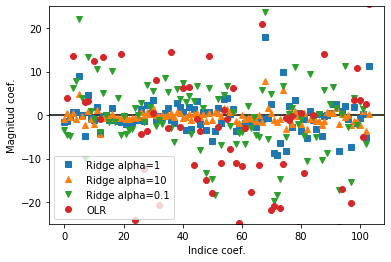

In [20]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="OLR")
plt.xlabel("Indice coef.")
plt.ylabel("Magnitud coef.")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
# A mayor alpha más cercan están de la línea,
# dando aun más peso a determinadas carecterísticas respecto a los otros alphas
# Teniendo alpha muy alto es más restringido y nos podemos cargar la predicción

**Discusión**

El eje $x$ tiene las componentes del vector de coeficientes ($x=0$ es $w_0$, $x=100$ es $w_100$), y el eje $y$ tiene el valor numérico del coeficiente.

Un $\alpha$ más alto significa un modelo más restringido, así que esperamos que las magnitudes de los coeficientes sean menores. Para $\alpha=10$, vemos que el valor de los coeficientes permanece mayormente en el intervalo $[-3,3]$. Para $\alpha=1$ los coeficientes son lago más grandes, y para $\alpha=0.1$ lo son aún más y se ve que muchos de sus datapoints corresponden con el valor de la regresión lineal (que sería $\alpha=0$) y son tan grandes que se salen de la gráfica.



Otra manera de entender la influencia de la regularización es fijar $\alpha$ e ir cambiando la cantidad de datos en el training dataset. Eso es lo que puede verse en el gráfico que sigue:

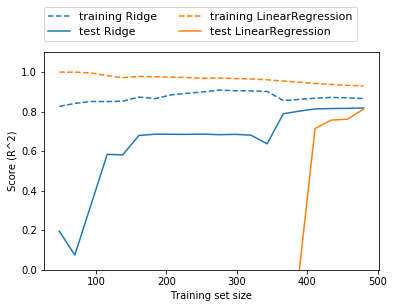

In [21]:
mglearn.plots.plot_ridge_n_samples()
# Se ve que la Línea regresión necesita un mínimo de datos, mientras que el Ridge no.
# Conclusión: Usaremos Ridge cuando no tengamos una gran cantidad de datos
# Se ve que con más datos, baja el rendimiento del training

**Discusión**

Como esperábamos, $R^2$ para el traning set es más alto que para el testing set tanto para Ridge como para OLS. Ya que Ridge está regularizado, su $Rˆ2$ en training es más bajo que para OLS independientemente del tamaño del dataset.

Sin embargo, su test score es mejor, en particular para datasets más pequeños. Para menos de 400 puntos OLS no aprende nada. En cuanto vamos incrementando la cantidad de datos, se ve que ambos modelos mejoran, y OLS alcanza el rendimiento del Ridge justo al final.

La conclusión es que con datasets suficientemente grandes, la regularización pierde importancia, y que ambos Ridge y OLS tiene el mismo rendimiento.

Otro aspecto interesante es que el rendimiento de entrenamiento decrece con el aumento de datos para la regresión lineal. Esto implica que cuantos más datos se añaden al modelo, más difícil es que se produzca sobreajuste o que se memoricen los datos.

### Regresión LASSO (Least Absolute Shrinkage and Selection Operator)

Lasso es una alternativa a la regresión contraída. Utiliza una técnica similar consistente e reducir los coeficientes a casi cero, pero utilizando regularización $L1$.

Cuando se usa $L1$, algunos coeficientes se hacen directamente cero, que implica que algunos coeficientes son ignorados por completo por el modelo.

Esto constituye de facto una manera de hacer selección de características, aumentando la interpretabilidad del modelo y poniendo de relieve las características más importantes del mismo.

Vamos a aplicar la técnica LASSO al dataset de Boston Housing:

In [24]:
# Esta es una regulación de nivel 1 (L1), similar a Ridge, pero aún más drástica
# Lo vamos a utilizar cuando tenemos la sospecha que algunas características son muy importantes
# (y puede que lo sepamos por análisis descriptivos anteriores)

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(
    lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(
    lasso.score(X_test, y_test)))

# Suma las características que sean distintas de cero
print("Características usadas:", np.sum(lasso.coef_ != 0))

# funciona muy muy mal y puede ser porque estamos utilizando solo 3 características de 106
# habría que probar un valor de alpha diferente

Training set score: 0.27
Test set score: 0.26
Características usadas: 3


**Discusión**

Como puede verse, Lasso ha funcionado bastante mal en ambos sets de datos, lo cual indica que el modelo está subajustando. Esto puede verse porque sólo se han usado 4 características de 105.

Al igual que Ridge, Lasso tiene un parámetro $\alpha$ de regularización que controla cómo de rápido los coeficientes convergen a cero. En el ejemplo anterior, al no ser especificado, se está usando un valor por defecto $\alpha=1.0$.

Para reducir el subajuste, se decrece el valor de $\alpha$. Cuando se hace esto también hay que incrementar el valor por defecto de `max_iter` (que por defecto es 1000):

In [25]:
# Decrementamos el valor de alpha a 0.01
# Incrementamos el número de "max_iter",
# De otra forma, el modelo nos advertirá de que deberíamos incrementarlo.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(
    X_train, y_train)
print("Training set score: {:.2f}".format(
    lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}"
      .format(lasso001.score(X_test, y_test)))
print("Características usadas:",
      np.sum(lasso001.coef_ != 0))
# Hay una mejora importante, y como se ve ha cogido más características

Training set score: 0.89
Test set score: 0.80
Características usadas: 34


**Discusión**

Un `alpha` más bajo nos permite un ajuste más complejo, que funcionará mejor sobre los datasets de training y test, y el rendimiento es algo mejor que usando Ridge. Estamos usando 33 de 105 características, siendo también el modelo algo menos complicado de entender.

Si hiciésemos `alpha` demasiado bajo, eliminaríamos el efecto de la regularización y acabaríamos sobreajustando, con un resultado en consecuencia muy similar al de `LinearRegression`:

In [26]:
# Probamos con un alpha de 0001
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Características usadas:", np.sum(lasso0001.coef_ != 0))

# Hay mejora en el test, pero el Train es más alto, pero tal vez demasiado, aún así es bueno
# Dependerá de otras cosas qué elegir, como el coste computacional económica, por ejemplo.

Training set score: 0.94
Test set score: 0.81
Características usadas: 95


Una vez más, podemos pintar los coeficientes de los modelos anteriores con valores distintos de `alpha`:

Text(0, 0.5, 'Magnitud del coeficiente')

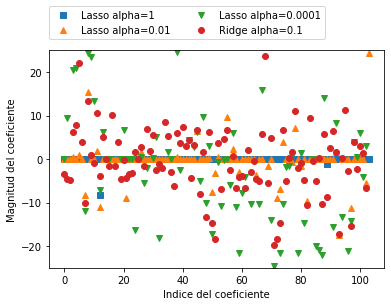

In [27]:
plt.plot(lasso.coef_, 's',
         label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^',
         label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v',
         label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o',
         label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Indice del coeficiente")
plt.ylabel("Magnitud del coeficiente")
# Como se ve con valor 1, solo hay 3 características fuera de la línea.

**Discusión**

Para `alpha`=1 se ve que la mayoría de los coeficientes son cero, y que los cuatro restantes son pequeños. Al decrementar `alpha` tenemos la solución marcada con triángulos rojos, que hace que la mayoría de las características sean cero. Con `alpha`=0.0001 nos queda un modelo bastante desregularizado, con la mayoría de los coeficientes distintos de cero y de gran magnitud.

El modelo Ridge con `alpha`=0.1 tiene un rendimiento similar al Lasso con `alpha`=0.01, pero con Ridge todos los coeficientes son distintos de cero.

En la práctica, la regresión Ridge es la primera opción entre los dos. Sin embargo, si el número de características es alto y se espera que sólo algunas de ellas sean relevantes, Lasso puede ser una mejor elección.

De la misma forma, si lo que queremos es tener un modelo fácil de interpretar, Lasso es la opción ya que sólo usa un subconjunto de las características. Scikit-learn da la clase [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elasticnet#sklearn.linear_model.ElasticNet) que combina ambos. En la práctica la combinación funciona mejor, al precio de tener que ajustar dos parámetros: uno para la regularización $L1$ y otro para la $L2$.